<a href="https://colab.research.google.com/github/Gail529/Time-series-Forecasting/blob/main/ARIMA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from statsmodels.tsa.stattools import  adfuller #checking for stationarity
from statsmodels.tsa.seasonal import seasonal_decompose 
from statsmodels.tsa.arima_model import ARIMA #loading the ARIMA model
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
price_df=pd.read_csv('/content/gold_price_data.csv')

In [3]:
head=price_df.head(5000)
head

,Date,Value
0,1970-01-01,35.2
1,1970-04-01,35.1
2,1970-07-01,35.4
3,1970-10-01,36.2
4,1971-01-01,37.4
...,...,...
4995,1998-01-01,290.2
4996,1998-01-02,288.0
4997,1998-01-05,284.4
4998,1998-01-06,282.8


In [4]:
print(price_df.shape)
print(price_df.describe())
print(price_df.dtypes)


(10787, 2)
              Value
count  10787.000000
mean     653.596634
std      434.030848
min       35.100000
25%      349.200000
50%      409.350000
75%     1061.625000
max     1895.000000
Date      object
Value    float64
dtype: object


In [23]:
price.describe()

,Value,Value_diff,Forecast
count,5000.000000,4999.000000,0.0
mean,976.768090,0.259912,NaN
std,451.997375,11.510148,NaN
min,255.950000,-140.500000,NaN
25%,471.537500,-3.750000,NaN
50%,1133.450000,0.050000,NaN
75%,1307.025000,4.550000,NaN
max,1895.000000,77.000000,NaN


In [5]:
start_date= '2001-01-15'
price=price_df.loc[(price_df['Date'] >= start_date)]
price.set_index('Date',inplace=True)

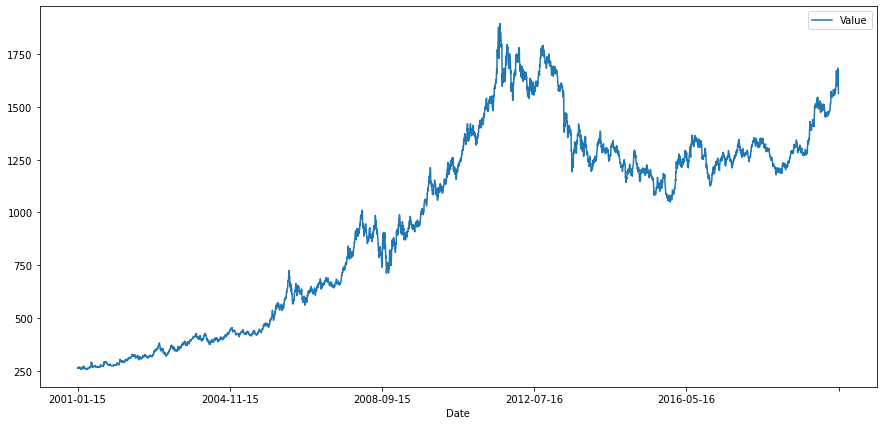

In [6]:
from pylab import rcParams
rcParams['figure.figsize'] = 15, 7
price.plot()

To identify the nature of data, we will be using the null hypothesis.

H0: The null hypothesis: It is a statement about the population that either is believed to be true or is used to put forth an argument unless it can be shown to be incorrect beyond a reasonable doubt.

H1: The alternative hypothesis: It is a claim about the population that is contradictory to H0 and what we conclude when we reject H0.

Ho: It is non-stationary
H1: It is stationary
We will be considering the null hypothesis that data is not stationary and the alternate hypothesis that data is stationary.

In [10]:
def adf_test(x):
    result=adfuller(x.dropna())
    print('ADF statistic: %f' %result[0])
    print('p-value: %f' %result[1])
    if result[1] >= 0.05:
        print("Data is non-stationary")#accept the null hypothesis
    else:
        print("Data is stationary")#reject the null hypothesis


adf_test(price['Value'])

ADF statistic: -1.024054
p-value: 0.744390
Data is non-stationary


Differencing 


In [8]:
price['Value_diff'] = price['Value'].diff(periods=1)
price['Value_diff']= price['Value_diff'][1:]
price.head(5)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Value,Value_diff
Date,,
2001-01-15,263.50,NaN
2001-01-16,264.45,0.95
2001-01-17,263.50,-0.95
2001-01-18,264.90,1.40
2001-01-19,264.90,0.00


In [11]:
adf_test(price['Value_diff'])

ADF statistic: -13.687045
p-value: 0.000000
Data is stationary


 Finding P (order of the AR term)

<Figure size 576x360 with 0 Axes>

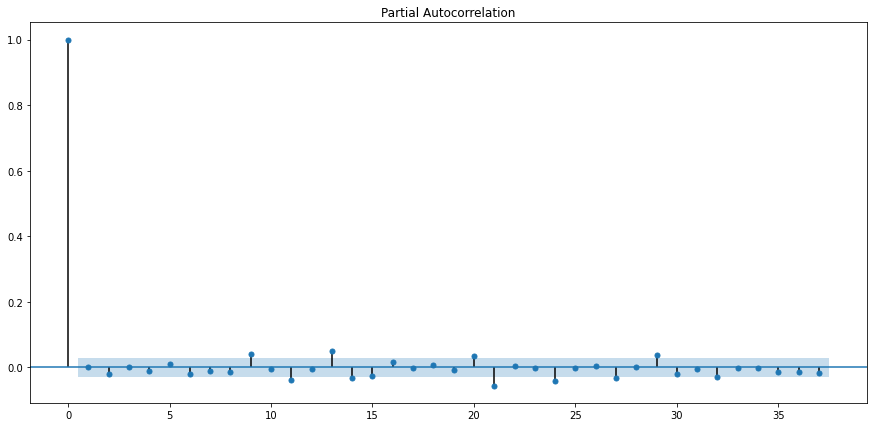

<Figure size 576x360 with 0 Axes>

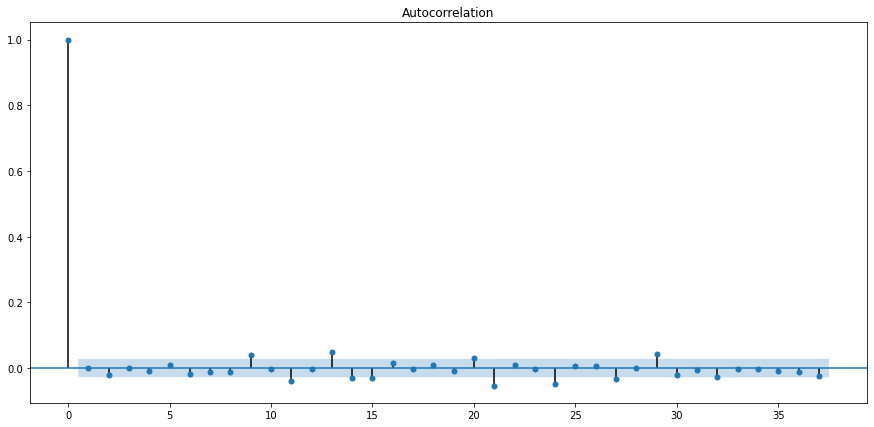

In [14]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
import statsmodels.api as sm
#PACF for the p term
fig = plt.figure(figsize=(8,5))
fig = sm.graphics.tsa.plot_pacf(price['Value_diff'].dropna())
plt.show()

#ACF for the q term
fig = plt.figure(figsize=(8,5))
fig = sm.graphics.tsa.plot_acf(price['Value_diff'].dropna())
plt.show()


In [18]:
#p=0 ,d=1 ,q=0
model = ARIMA(price['Value'],order=(0,1,0))
arima_model = model.fit(disp=0)
arima_model.summary()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  % freq, ValueWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                D.Value   No. Observations:                 4999
Model:                 ARIMA(0, 1, 0)   Log Likelihood              -19306.476
Method:                           css   S.D. of innovations             11.509
Date:                Mon, 06 Sep 2021   AIC                          38616.952
Time:                        13:14:53   BIC                          38629.986
Sample:                    01-16-2001   HQIC                         38621.520
                         - 03-13-2020                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2599      0.163      1.597      0.110      -0.059       0.579
==============================================================================
"""

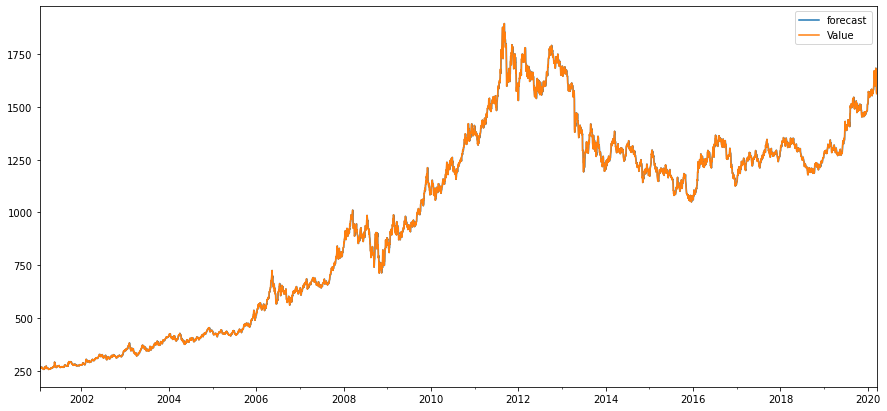

In [21]:
arima_model.plot_predict(dynamic=False)
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


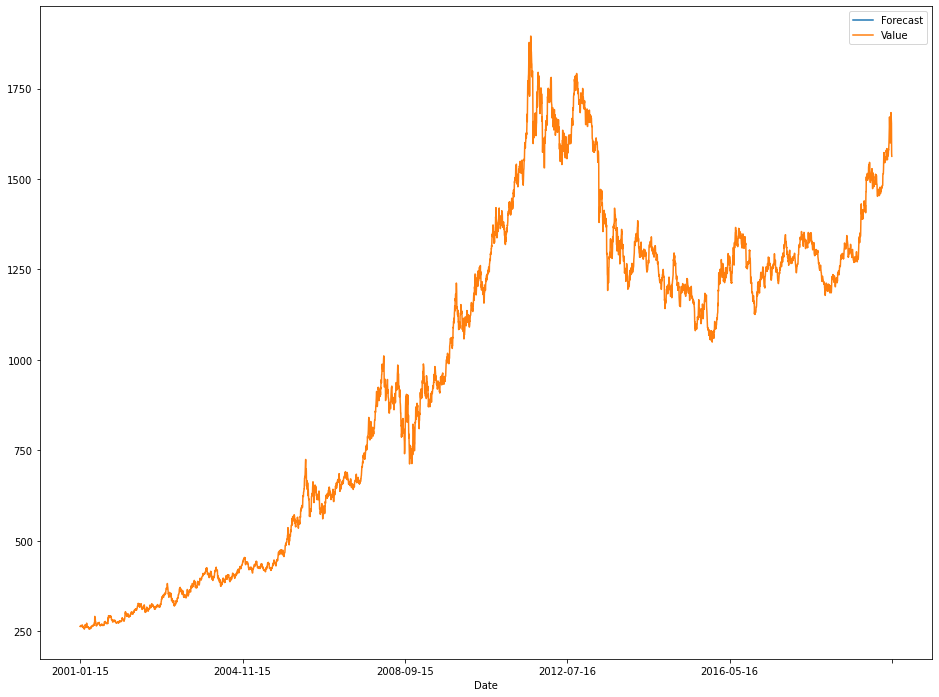

In [24]:
price['Forecast'] = arima_model.predict(dynamic=True)
price[['Forecast','Value']].plot(figsize=(16,12))